# 邏輯回歸二分類實作

## Step 1: 導入所需的套件

In [1]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt

## 導入Sklearn中的線性模組
from sklearn import linear_model

## 將數據集分成訓練集與測試集的套件
from sklearn.model_selection import train_test_split

## Step 2: 導入數據集

In [2]:
## 導入數據集
data = pd.read_csv('data/logistic_regression_sample.csv')

## 顯示數據集
data

,Student,Hours,Pass
0,Jack,4,1
1,Allen,4,1
2,Jen,2,0
3,Dora,3,0
4,John,1,0
5,Doris,1,0
6,Cindy,3,1
7,Ken,3,1
8,Angel,4,0
9,Tom,4,1


## Step 3: 定義自變量與應變量

In [3]:
## 定義自變量與應變量
X = data['Hours'].values
y = data['Pass'].values

print('Independent Variable: ', X)
print('Dependent Variable: ', y)


Independent Variable:  [4 4 2 3 1 1 3 3 4 4 1 1 2 2 3 3 3 3 2]
Dependent Variable:  [1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1]


## Step 4: 將特徵向量轉為2D向量

In [4]:
## 由於 Sklearn 能接受的特徵格式為 (n_samples, n_features)，所以使用 reshape 將特徵資料轉為2D向量，這樣 Sklearn 才能使用，一般狀況下，一維特徵才需要轉換
print('Original X shape: ', X.shape)

## reshape用法: -1代表自動配置幾個框框(程式會自行根據有幾個值配置幾個框框架，也就是拿總共的數量除以後面設定框框內有幾個值)
## 轉為2D向量
X = X.reshape(-1, 1)
print(X)
print('After reshaping data to 2D vector : ', X.shape)

Original X shape:  (19,)
[[4]
 [4]
 [2]
 [3]
 [1]
 [1]
 [3]
 [3]
 [4]
 [4]
 [1]
 [1]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [2]]
After reshaping data to 2D vector :  (19, 1)


## Step 5: 將數據集分成訓練集與測試集

In [5]:
## 將數據集分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Step 6: 建立邏輯迴歸模型 Logistic Regression Model 與訓練模型

In [6]:
## 建立邏輯迴歸模型
model = linear_model.LogisticRegression()

## 擬和數據
model.fit(X_train, y_train)

LogisticRegression()

## Step 7: 檢視模型係數與截距 Coeficient & Interception

In [7]:
## 查看建出來的模型係數與截距 y = w1x + w0
w1 = float(model.coef_)
w0 = float(model.intercept_)

print('Coeficient: ', w1)
print('Interception: ', w0)

Coeficient:  0.5639206085337535
Interception:  -1.0321229560919454


## Step 8: Sigmoid - 套入轉換函數 (將Logit(Odds)值轉換成 -> 0~1之間的數值)

In [8]:
## 套用 Sigmoid轉換函數，將值轉換成介於0~1 之間的值(機率)
def sigmoid(x, w0, w1):
    logit_odds = w0 + w1 * x
    return 1 / (1 + np.exp(-logit_odds))
    

## Step 9: 視覺化轉換結果圖

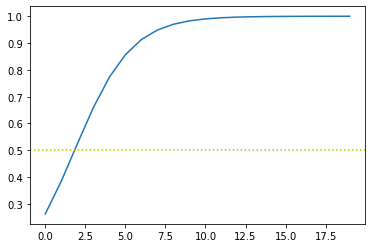

In [9]:
## 視覺化後Sigmoid圖
x = np.arange(0, 20, 1)
result = sigmoid(x, w0, w1)

plt.plot(x, result)

## 畫出50%的機率線
plt.axhline(y = 0.5, ls = 'dotted', color = 'y')


## Step 10: 預測測試集

In [10]:
## 預測測試集
prediction = model.predict(X_test)

print('Real Result: ', y_test)
print('Model Predict: ', prediction)


## 預測自行定義的數據集
result = model.predict([[1], [2], [2.5], [3], [3.5], [4], [5], [6]])

print('Define your own data and predict: ', result)

Real Result:  [1 0 0 0]
Model Predict:  [1 1 1 0]
Define your own data and predict:  [0 1 1 1 1 1 1 1]


## Step 11: 模型預測測試集中每筆數據為0或1的機率

In [11]:
## 預測測試集為1或0的機率
proba = model.predict_proba(X_test)
print('Probability (0 or 1)', proba)

Probability (0 or 1) [[0.34082074 0.65917926]
 [0.47608869 0.52391131]
 [0.22731066 0.77268934]
 [0.61495819 0.38504181]]


## Step 12: 模型表現 - 準確度 Accuracy

In [12]:
## 模型表現
score = model.score(X_test, y_test)
print('Accuracy :' + str(score * 100) + '%')

Accuracy :50.0%
